In [1]:
%load_ext autoreload
%autoreload 2

# Project CodeNet Benchmarks
We analyze the three benchmarks: Project_CodeNet_C++1000, Project_CodeNet_Java250, Project_CodeNet_Python800

- How many overlapping problems?
  - 240
- Do they all have 'Accepted status'?
  - yes
- What language version?
  - very different
- According to readme, SPTs can be successfully constructed

In [9]:
import os
cpp_dataset_path = "C:\\Users\\sebas\\Documents\\Masterarbeit\\Project_CodeNet\\derived\\benchmarks\\Project_CodeNet_C++1000\\Project_CodeNet_C++1000"
cpp_problem_ids = os.listdir(cpp_dataset_path)

java_dataset_path = "C:\\Users\\sebas\\Documents\\Masterarbeit\\Project_CodeNet\\derived\\benchmarks\\Project_CodeNet_Java250"
java_problem_ids = os.listdir(java_dataset_path)

py_dataset_path = "C:\\Users\\sebas\\Documents\\Masterarbeit\\Project_CodeNet\\derived\\benchmarks\\Project_CodeNet_Python800"
py_problem_ids = os.listdir(py_dataset_path)


In [11]:
intersecting_problems = set(cpp_problem_ids) & set(java_problem_ids) & set(py_problem_ids)

In [12]:
len(intersecting_problems)

240

In [26]:
from dataset.CodeNet import CodeNet
code_net = CodeNet(location=r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet")

In [27]:
submission_metadata = code_net.get_submission_metadata()
submission_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13916868 entries, 0 to 1088
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   submission_id      string
 1   problem_id         string
 2   user_id            string
 3   date               Int64 
 4   language           string
 5   original_language  string
 6   filename_ext       string
 7   status             string
 8   cpu_time           Int64 
 9   memory             Int64 
 10  code_size          Int64 
 11  accuracy           string
dtypes: Int64(4), string(8)
memory usage: 1.4 GB


In [15]:
submission_ids = []
dataset_directories = [cpp_dataset_path, java_dataset_path, py_dataset_path]
for dataset_dir in dataset_directories:
    for p_id in intersecting_problems:
        submissions = os.listdir(dataset_dir + "\\" + p_id)
        for s in submissions:
            submission_ids.append(s[:10])
            

In [17]:
len(submission_ids)

264000

In [19]:
dataset_submission_metadata = submission_metadata.query(f'submission_id in {submission_ids}')

In [20]:
dataset_submission_metadata.groupby(["original_language"]).size().reset_index(name="count").sort_values("count", ascending=False)

,original_language,count
4,C++ (GCC 9.2.1),79093
21,Python (3.8.2),41765
13,Java8 (OpenJDK 1.8.0),38356
0,C++,19644
11,Java (OpenJDK 11.0.6),15481
9,JAVA,14100
8,C++14 (GCC 5.4.1),13828
22,Python3,10473
17,PyPy3 (7.3.0),8903
20,Python (3.4.3),6205


In [21]:
dataset_submission_metadata.groupby(["status"]).size().reset_index(name="count").sort_values("count", ascending=False)

,status,count
0,Accepted,264000


In [22]:
dataset_submission_metadata.groupby(["language"]).size().reset_index(name="count").sort_values("count", ascending=False)

,language,count
0,C++,120000
1,Java,72000
2,Python,72000


# Clean CPP14 Dataset

In [2]:
from dataset.CodeNet import CodeNet
code_net = CodeNet(location=r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet")

In [3]:
submission_metadata = code_net.get_submission_metadata()
submission_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13916868 entries, 0 to 1088
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   submission_id      string
 1   problem_id         string
 2   user_id            string
 3   date               Int64 
 4   language           string
 5   original_language  string
 6   filename_ext       string
 7   status             string
 8   cpu_time           Int64 
 9   memory             Int64 
 10  code_size          Int64 
 11  accuracy           string
dtypes: Int64(4), string(8)
memory usage: 1.4 GB


In [4]:
accepted_cpp_submissions = submission_metadata.query("language == 'C++' and status == 'Accepted'")
accepted_cpp_submissions.groupby(["original_language"]).size().reset_index(name="count").sort_values("count", ascending=False)

,original_language,count
12,C++14 (GCC 5.4.1),2716247
7,C++ (GCC 9.2.1),953252
0,C++,351070
10,C++14,125336
8,C++11,60431
11,C++14 (Clang 3.8.0),56032
5,C++ (GCC 5.4.1),47007
2,C++ (Clang 10.0.0),32670
6,C++ (GCC 9.2.1 with AC Library v1.1),7154
3,C++ (Clang 3.8.0),2035


In [5]:
accepted_cpp14_submissions = accepted_cpp_submissions.query("original_language in ['C++14 (GCC 5.4.1)', 'C++14', 'C++14 (Clang 3.8.0)']")
accepted_cpp14_submissions

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
8431,s244613793,p00000,u851121794,1532095342,C++,C++14,cpp,Accepted,0,3068,219,1/1
8432,s994763792,p00000,u011621222,1535256589,C++,C++14,cpp,Accepted,0,3052,164,1/1
8447,s115719540,p00000,u835578475,1545288670,C++,C++14,cpp,Accepted,0,3108,1190,1/1
8449,s774811895,p00000,u199259534,1545369483,C++,C++14,cpp,Accepted,0,3076,876,1/1
8451,s012885860,p00000,u011621222,1545445095,C++,C++14,cpp,Accepted,0,3200,221,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,s566240600,p04052,u452725238,1468769420,C++,C++14 (GCC 5.4.1),cpp,Accepted,3986,41088,1596,<NA>
1061,s486243623,p04052,u291111534,1468730935,C++,C++14 (GCC 5.4.1),cpp,Accepted,2862,169324,2692,<NA>
1063,s586590522,p04052,u965174248,1468730601,C++,C++14 (Clang 3.8.0),cpp,Accepted,2434,87672,3125,<NA>
1068,s463537063,p04052,u967083551,1468727579,C++,C++14 (GCC 5.4.1),cpp,Accepted,459,27648,1471,<NA>


## Filter non parsable by Eclipse CDT
SuccessCount:     2874387
FailedCount:      23172
otherErrorCount:  56

In [6]:
import re
non_parsable_cpp_submission_ids = []
path = r"C:\Users\sebas\Documents\Masterarbeit\datasets\cpp_parse_error_files.txt"
with open(path, 'r', encoding='utf-8') as file:
    while (line := file.readline().rstrip()):
        submission_id = re.findall(r"s\d{9}", line)[0]
        non_parsable_cpp_submission_ids.append(submission_id)

In [8]:
len(non_parsable_cpp_submission_ids)

23228

In [10]:
cpp14_submissions_filtered_np = accepted_cpp14_submissions.query(f"submission_id not in {non_parsable_cpp_submission_ids}")
cpp14_submissions_filtered_np

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
8431,s244613793,p00000,u851121794,1532095342,C++,C++14,cpp,Accepted,0,3068,219,1/1
8432,s994763792,p00000,u011621222,1535256589,C++,C++14,cpp,Accepted,0,3052,164,1/1
8447,s115719540,p00000,u835578475,1545288670,C++,C++14,cpp,Accepted,0,3108,1190,1/1
8449,s774811895,p00000,u199259534,1545369483,C++,C++14,cpp,Accepted,0,3076,876,1/1
8451,s012885860,p00000,u011621222,1545445095,C++,C++14,cpp,Accepted,0,3200,221,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,s566240600,p04052,u452725238,1468769420,C++,C++14 (GCC 5.4.1),cpp,Accepted,3986,41088,1596,<NA>
1061,s486243623,p04052,u291111534,1468730935,C++,C++14 (GCC 5.4.1),cpp,Accepted,2862,169324,2692,<NA>
1063,s586590522,p04052,u965174248,1468730601,C++,C++14 (Clang 3.8.0),cpp,Accepted,2434,87672,3125,<NA>
1068,s463537063,p04052,u967083551,1468727579,C++,C++14 (GCC 5.4.1),cpp,Accepted,459,27648,1471,<NA>


## Filter outliers

In [11]:
import re
outlier_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\C++\C++_accepted_outliers.txt"
outlier_submission_ids = []
with open(outlier_path, 'r', encoding='utf-8') as file:
    while (line := file.readline().rstrip()):
        submission_id = re.findall(r"s\d{9}", line)[0]
        outlier_submission_ids.append(submission_id)

In [13]:
len(outlier_submission_ids)

106287

In [14]:
cpp14_outlier_filtered = cpp14_submissions_filtered_np.query(f"submission_id not in {outlier_submission_ids}")
cpp14_outlier_filtered

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
8431,s244613793,p00000,u851121794,1532095342,C++,C++14,cpp,Accepted,0,3068,219,1/1
8432,s994763792,p00000,u011621222,1535256589,C++,C++14,cpp,Accepted,0,3052,164,1/1
8447,s115719540,p00000,u835578475,1545288670,C++,C++14,cpp,Accepted,0,3108,1190,1/1
8449,s774811895,p00000,u199259534,1545369483,C++,C++14,cpp,Accepted,0,3076,876,1/1
8451,s012885860,p00000,u011621222,1545445095,C++,C++14,cpp,Accepted,0,3200,221,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,s566240600,p04052,u452725238,1468769420,C++,C++14 (GCC 5.4.1),cpp,Accepted,3986,41088,1596,<NA>
1061,s486243623,p04052,u291111534,1468730935,C++,C++14 (GCC 5.4.1),cpp,Accepted,2862,169324,2692,<NA>
1063,s586590522,p04052,u965174248,1468730601,C++,C++14 (Clang 3.8.0),cpp,Accepted,2434,87672,3125,<NA>
1068,s463537063,p04052,u967083551,1468727579,C++,C++14 (GCC 5.4.1),cpp,Accepted,459,27648,1471,<NA>


## Filter duplicate submissions

In [27]:
dupl_clusters_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\C++\clusters"
cluster_files = os.listdir(dupl_clusters_path)
cluster_dict = {}
cluster_no = 0
cluster_dict[cluster_no] = []
for cluster_file in cluster_files:
    cluster_file_path = f"{dupl_clusters_path}\\{cluster_file}"
    with open(cluster_file_path, 'r', encoding='utf-8') as file:
        while (line := file.readline()):
            line = line.rstrip()
            if (line == ''):
                cluster_no += 1
                cluster_dict[cluster_no] = []
            else:
                submission_id = re.findall(r"s\d{9}", line)[0]
                cluster_dict[cluster_no].append(submission_id)
    

In [29]:
cluster_dict_filtered = {key:val for key, val in cluster_dict.items() if len(val) > 1}

In [44]:
cluster_dict_removed_submissions = {}
cpp14_outlier_filtered_sub_ids = set(cpp14_outlier_filtered['submission_id'].values)
for key, value in cluster_dict_filtered.items():
    cluster_dict_removed_submissions[key] = []
    for v in value:
        if v in cpp14_outlier_filtered_sub_ids:
            cluster_dict_removed_submissions[key].append(v)

In [49]:
cluster_dict_filtered_1 = {key:val for key, val in cluster_dict_removed_submissions.items() if len(val) > 1}

In [73]:
import random
duplicate_submission_ids = []
for key, value in cluster_dict_filtered_1.items():
    tmp = value.copy()
    tmp.remove(random.choice(tmp))
    duplicate_submission_ids.extend(tmp)

In [76]:
len(duplicate_submission_ids)

529917

In [78]:
cpp14_dupl_filtered = cpp14_outlier_filtered.query(f"submission_id not in {duplicate_submission_ids}")
cpp14_dupl_filtered

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
8431,s244613793,p00000,u851121794,1532095342,C++,C++14,cpp,Accepted,0,3068,219,1/1
8432,s994763792,p00000,u011621222,1535256589,C++,C++14,cpp,Accepted,0,3052,164,1/1
8447,s115719540,p00000,u835578475,1545288670,C++,C++14,cpp,Accepted,0,3108,1190,1/1
8449,s774811895,p00000,u199259534,1545369483,C++,C++14,cpp,Accepted,0,3076,876,1/1
8453,s292639760,p00000,u640847666,1545596458,C++,C++14,cpp,Accepted,0,3156,643,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...
1047,s291273899,p04052,u801556382,1468776808,C++,C++14 (GCC 5.4.1),cpp,Accepted,591,54400,1982,<NA>
1049,s566240600,p04052,u452725238,1468769420,C++,C++14 (GCC 5.4.1),cpp,Accepted,3986,41088,1596,<NA>
1061,s486243623,p04052,u291111534,1468730935,C++,C++14 (GCC 5.4.1),cpp,Accepted,2862,169324,2692,<NA>
1068,s463537063,p04052,u967083551,1468727579,C++,C++14 (GCC 5.4.1),cpp,Accepted,459,27648,1471,<NA>


## Filter identical problems

In [115]:
cpp14_dupl_filtered_problem_count = cpp14_dupl_filtered.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False)
cpp14_dupl_filtered_problem_count

,problem_id,count
2753,p03160,11846
2754,p03161,11527
2755,p03162,10816
2756,p03163,10777
2758,p03165,6938
...,...,...
901,p00944,1
1139,p01245,1
687,p00699,1
686,p00698,1


In [116]:
ident_problems_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\identical_problem_clusters"
duplicate_problem_ids = []
with open(ident_problems_path, 'r', encoding='utf-8') as file:
    while (line := file.readline().rstrip()):
        cluster = line.split(',')
        cluster_rows = cpp14_dupl_filtered_problem_count.query(f"problem_id in {cluster}")
        largest_cluster_idx = cluster_rows['count'].idxmax()
        largest_cluster_problem_id = cluster_rows.loc[largest_cluster_idx]['problem_id']
        cluster.remove(largest_cluster_problem_id)
        duplicate_problem_ids.extend(cluster)

In [117]:
len(duplicate_problem_ids)

155

In [118]:
cpp14_final = cpp14_dupl_filtered.query(f"problem_id not in {duplicate_problem_ids}")
cpp14_final

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
8431,s244613793,p00000,u851121794,1532095342,C++,C++14,cpp,Accepted,0,3068,219,1/1
8432,s994763792,p00000,u011621222,1535256589,C++,C++14,cpp,Accepted,0,3052,164,1/1
8447,s115719540,p00000,u835578475,1545288670,C++,C++14,cpp,Accepted,0,3108,1190,1/1
8449,s774811895,p00000,u199259534,1545369483,C++,C++14,cpp,Accepted,0,3076,876,1/1
8453,s292639760,p00000,u640847666,1545596458,C++,C++14,cpp,Accepted,0,3156,643,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...
1047,s291273899,p04052,u801556382,1468776808,C++,C++14 (GCC 5.4.1),cpp,Accepted,591,54400,1982,<NA>
1049,s566240600,p04052,u452725238,1468769420,C++,C++14 (GCC 5.4.1),cpp,Accepted,3986,41088,1596,<NA>
1061,s486243623,p04052,u291111534,1468730935,C++,C++14 (GCC 5.4.1),cpp,Accepted,2862,169324,2692,<NA>
1068,s463537063,p04052,u967083551,1468727579,C++,C++14 (GCC 5.4.1),cpp,Accepted,459,27648,1471,<NA>


In [126]:
cpp14_final_problem_count = cpp14_final.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False)
cpp14_final_problem_count

,problem_id,count
2737,p03160,11846
2738,p03161,11527
2739,p03162,10816
2740,p03163,10777
2741,p03165,6938
...,...,...
2025,p02263,521
3189,p03690,520
3327,p03850,508
3277,p03792,508


In [124]:
cpp14_final.to_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14.csv")

In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14.csv", index_col=0)

C:\Users\sebas\AppData\Local\Temp\ipykernel_14392\43010591.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14.csv", index_col=0)


In [8]:
df

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
8431,s244613793,p00000,u851121794,1532095342,C++,C++14,cpp,Accepted,0,3068,219,1/1
8432,s994763792,p00000,u011621222,1535256589,C++,C++14,cpp,Accepted,0,3052,164,1/1
8447,s115719540,p00000,u835578475,1545288670,C++,C++14,cpp,Accepted,0,3108,1190,1/1
8449,s774811895,p00000,u199259534,1545369483,C++,C++14,cpp,Accepted,0,3076,876,1/1
8453,s292639760,p00000,u640847666,1545596458,C++,C++14,cpp,Accepted,0,3156,643,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...
1047,s291273899,p04052,u801556382,1468776808,C++,C++14 (GCC 5.4.1),cpp,Accepted,591,54400,1982,NaN
1049,s566240600,p04052,u452725238,1468769420,C++,C++14 (GCC 5.4.1),cpp,Accepted,3986,41088,1596,NaN
1061,s486243623,p04052,u291111534,1468730935,C++,C++14 (GCC 5.4.1),cpp,Accepted,2862,169324,2692,NaN
1068,s463537063,p04052,u967083551,1468727579,C++,C++14 (GCC 5.4.1),cpp,Accepted,459,27648,1471,NaN


In [13]:
problem_ids = df.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False)
problem_ids

,problem_id,count
2737,p03160,11846
2738,p03161,11527
2739,p03162,10816
2740,p03163,10777
2741,p03165,6938
...,...,...
1100,p01163,1
1102,p01168,1
171,p00171,1
1103,p01169,1


In [19]:
problem_id_dataset = problem_ids.query(f"count >= {1000}").sample(100)

In [23]:
problem_ids_dataset = list(problem_id_dataset['problem_id'].values)

In [25]:
len(problem_ids_dataset)

100

In [28]:
import os
import shutil
target_dir = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000"
for problem_id in problem_ids_dataset:
    cpp14_samples = df.query(f'problem_id == "{problem_id}"').sample(1000)

    problem_id_trg_dir = os.path.join(target_dir, problem_id)
    os.mkdir(problem_id_trg_dir)

    problem_id_cpp14_trg_dir = problem_id_trg_dir
    submission_ids = cpp14_samples["submission_id"].values
    paths = code_net.get_src_paths_of_submissions(list(submission_ids))
    for _, value in paths.items():
        shutil.copy(value, problem_id_cpp14_trg_dir)

In [29]:
import os
import re
path = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000"

fname = []
for root,d_names,f_names in os.walk(path):
    for f in f_names:
        fname.append(os.path.join(root, f))
with open(os.path.join(path, "ai4code_input.txt"), "w") as f:
    for fn in fname:
       problem_id = re.findall(r"p\d{5}", fn)[0]
       f.write(fn + " " + path + f"\\ai4code_cpp\\{problem_id}\\\n")

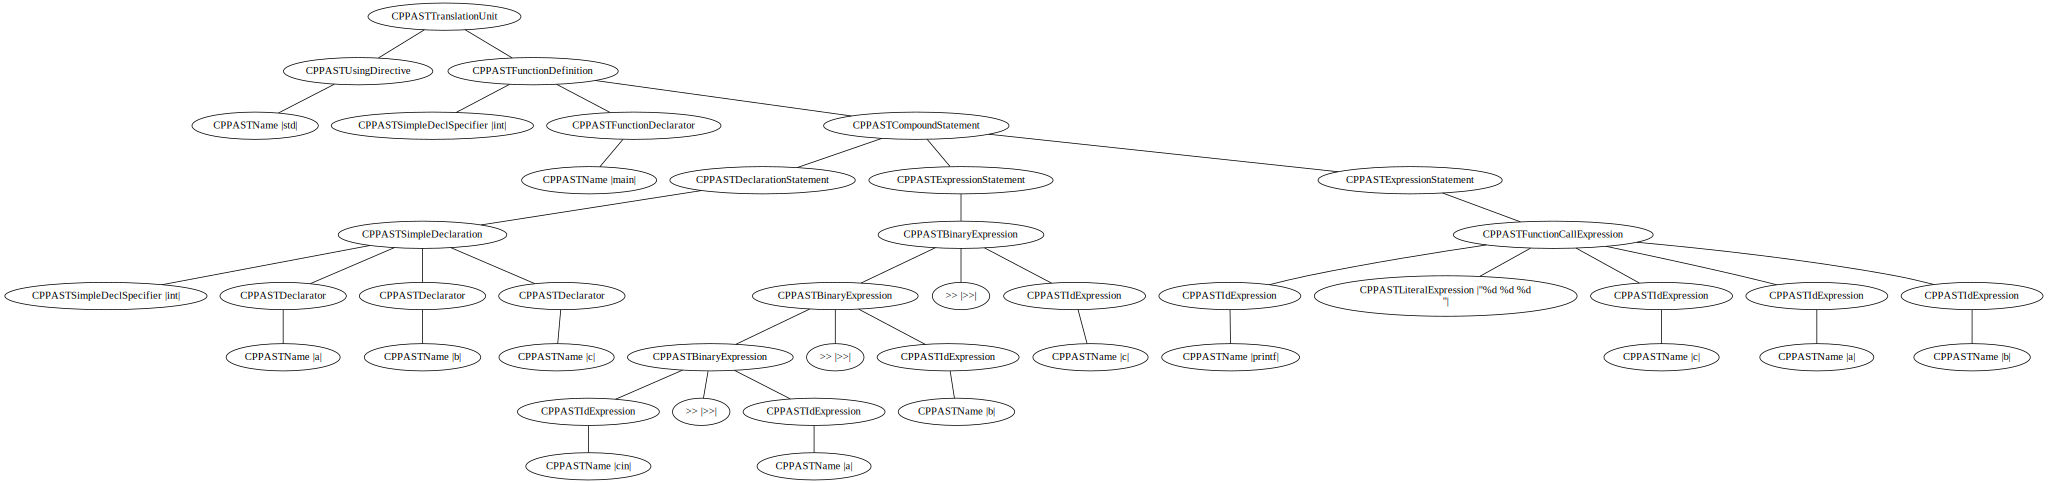

In [20]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000\ai4code_cpp\p02717\s634926480.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [5]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000\ai4code_problem_class_cpp", r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000\ai4code_cpp", 300, 50, 50)

In [22]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02722 ...
... finished p02722
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02732 ...
... finished p02732
processing p02765 ...
... finished p02765
processing p02767 ...
... finished p02767
processing p02787 ...
... finished p02787
processing p02792 ...
... finished p02792
processing p02814 ...
... finished p02814
processing p02818 ...
... finished p02818
processing p02831 ...
... finished p02831
processing p02835 ...
... finished p02835
processing p02841 ...
... finished p02841
processing p02847 ...
... finished p02847
processing p02853 ...
... finished p02853
processing p02856 ...
... finished p02856
processing p02860 ...
... finished p02860
processing p02891 ...
... finished p02891
processing p02900 ...
... finished p02900
processing p02913 ...
... finished p02913
processing p02935 ...
... finished p02935
processing p02936 ...
... finished p02936
processing p02951 ...
... finished

In [6]:
dataset.get_vocabulary_map()

{'!': 1,
 '!=': 2,
 '%': 3,
 '%=': 4,
 '&': 5,
 '&&': 6,
 '&=': 7,
 '*': 8,
 '*=': 9,
 '+': 10,
 '++': 11,
 '+=': 12,
 '-': 13,
 '--': 14,
 '-=': 15,
 '.': 16,
 '/': 17,
 '/=': 18,
 '<': 19,
 '<<': 20,
 '<<=': 21,
 '<=': 22,
 '=': 23,
 '==': 24,
 '>': 25,
 '>=': 26,
 '>>': 27,
 '>>=': 28,
 'CPPASTASMDeclaration': 29,
 'CPPASTAliasDeclaration': 30,
 'CPPASTArrayDeclarator': 31,
 'CPPASTArrayModifier': 32,
 'CPPASTArraySubscriptExpression': 33,
 'CPPASTBaseSpecifier': 34,
 'CPPASTBinaryExpression': 35,
 'CPPASTBreakStatement': 36,
 'CPPASTCapture': 37,
 'CPPASTCaseStatement': 38,
 'CPPASTCastExpression': 39,
 'CPPASTCatchHandler': 40,
 'CPPASTCompositeTypeSpecifier': 41,
 'CPPASTCompoundStatement': 42,
 'CPPASTCompoundStatementExpression': 43,
 'CPPASTConditionalExpression': 44,
 'CPPASTConstructorChainInitializer': 45,
 'CPPASTConstructorInitializer': 46,
 'CPPASTContinueStatement': 47,
 'CPPASTConversionName': 48,
 'CPPASTDeclarationStatement': 49,
 'CPPASTDeclarator': 50,
 'CPPASTDefa

In [7]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [12]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

30000/30000 [==============================] - 408s 14ms/step - loss: 0.2535 - categorical_accuracy: 0.9388 - precision: 0.9486 - recall: 0.9326 - val_loss: 0.4432 - val_categorical_accuracy: 0.9124 - val_precision: 0.9286 - val_recall: 0.9048


In [13]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5000/5000 [==============================] - 41s 8ms/step - loss: 0.3825 - categorical_accuracy: 0.9116 - precision: 0.9263 - recall: 0.9052


In [14]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

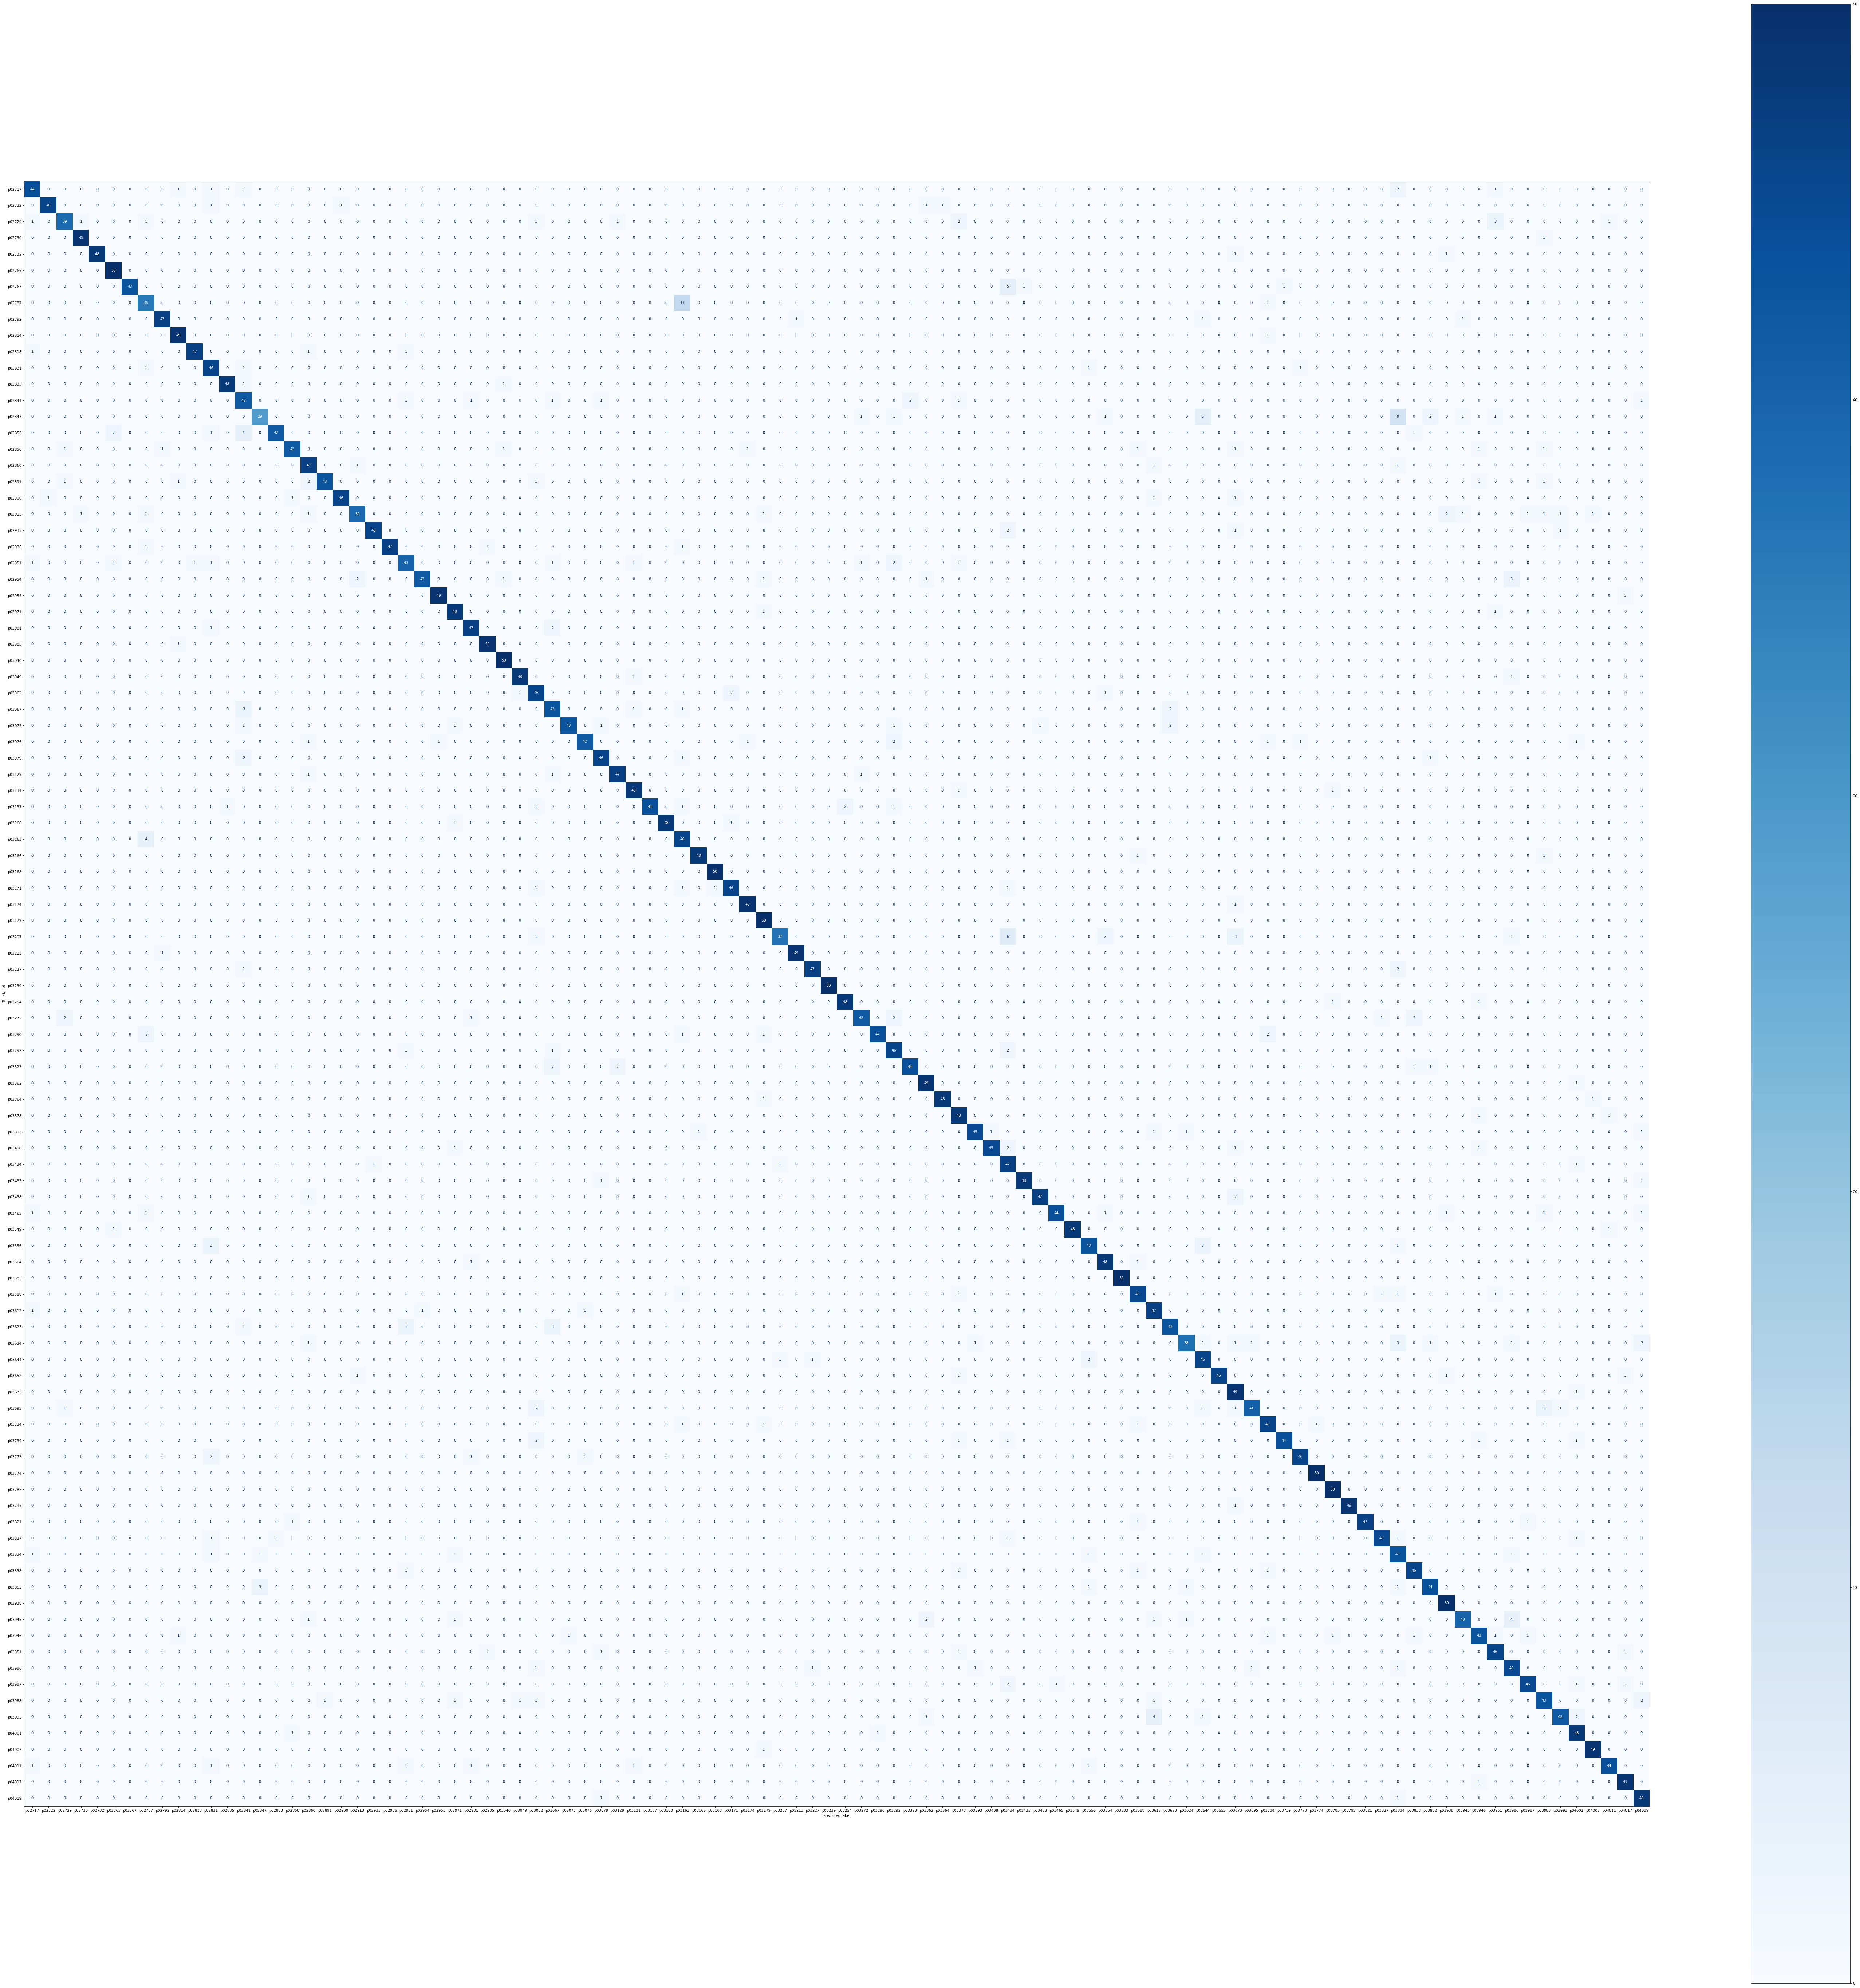

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(100, 100))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(expected_labels, predicted_labels, labels=labels))

              precision    recall  f1-score   support

      p02717       0.86      0.88      0.87        50
      p02722       0.98      0.92      0.95        50
      p02729       0.89      0.78      0.83        50
      p02730       0.96      0.98      0.97        50
      p02732       1.00      0.96      0.98        50
      p02765       0.93      1.00      0.96        50
      p02767       1.00      0.86      0.92        50
      p02787       0.77      0.72      0.74        50
      p02792       0.96      0.94      0.95        50
      p02814       0.92      0.98      0.95        50
      p02818       0.98      0.94      0.96        50
      p02831       0.78      0.92      0.84        50
      p02835       0.98      0.96      0.97        50
      p02841       0.74      0.84      0.79        50
      p02847       0.88      0.58      0.70        50
      p02853       0.98      0.84      0.90        50
      p02856       0.93      0.84      0.88        50
      p02860       0.84    

In [17]:
test_files[1]

'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\1_clean_datasets\\cpp14_100_1000\\ai4code_problem_class_cpp\\test\\s000497135.pkl'

In [63]:
nodes, children = test_generator.__getitem__(0)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
one_hot_node_type_name = nodes[0][0]
node_list = list(dataset.get_vocabulary_map())
node_list[0]
node_list[argmax(one_hot_node_type_name)-1]

'CPPASTTranslationUnit'

In [64]:
node_list = list(dataset.get_vocabulary_map())
overall_importance = {}
for test_item in test_generator:
    nodes, children = test_item[0]
    conv_filter_activations = model.conv_layer([nodes, children])
    node_importance = model.pooling_layer(conv_filter_activations)[0]
    node_importance_list = node_importance.numpy().tolist()[0]
    counter = Counter(node_importance_list)
    for node_id, value in counter.items():
        one_hot_node_type = nodes[0][node_id]
        node_type = node_list[argmax(one_hot_node_type)-1]
        if node_type in overall_importance:
            overall_importance[node_type] += value
        else:
            overall_importance[node_type] = value
    
overall_importance   
    

{'CPPASTTranslationUnit': 1156753,
 'CPPASTBinaryExpression': 713162,
 'CPPASTReturnStatement': 38849,
 'CPPASTConstructorInitializer': 15492,
 'CPPASTCompoundStatement': 241185,
 'CPPASTFunctionCallExpression': 142540,
 '<': 11067,
 'CPPASTEqualsInitializer': 29153,
 '>>': 30502,
 'CPPASTUnaryExpression': 94509,
 '>=': 8414,
 '-': 9638,
 'CPPASTArraySubscriptExpression': 39391,
 'CPPASTForStatement': 17084,
 'CPPASTTemplateId': 17935,
 'CPPASTFunctionDefinition': 39617,
 '<<': 3400,
 'CPPASTLiteralExpression': 4927,
 '--': 2891,
 'CPPASTIfStatement': 46625,
 'CPPASTNamedTypeSpecifier': 2786,
 'CPPASTDeclarator': 6871,
 '++': 8037,
 'CPPASTTypeId': 5750,
 'CPPASTSimpleDeclaration': 35905,
 'CPPASTDeclarationStatement': 13414,
 'CPPASTFunctionDeclarator': 55906,
 'CPPASTFieldReference': 19676,
 'CPPASTExpressionStatement': 25435,
 '<=': 10570,
 'CPPASTArrayModifier': 8103,
 '+=': 5090,
 'CPPASTUsingDirective': 2177,
 '&&': 1340,
 'CPPASTCastExpression': 15614,
 'CPPASTArrayDeclarator': 

In [65]:
for w in sorted(overall_importance, key=overall_importance.get, reverse=True):
    print(w, overall_importance[w])

CPPASTTranslationUnit 1156753
CPPASTBinaryExpression 713162
CPPASTCompoundStatement 241185
CPPASTFunctionCallExpression 142540
CPPASTUnaryExpression 94509
CPPASTFunctionDeclarator 55906
CPPASTIfStatement 46625
CPPASTFunctionDefinition 39617
CPPASTArraySubscriptExpression 39391
CPPASTReturnStatement 38849
CPPASTSimpleDeclaration 35905
>> 30502
CPPASTEqualsInitializer 29153
CPPASTExpressionStatement 25435
CPPASTInitializerList 21149
CPPASTFieldReference 19676
CPPASTTemplateId 17935
CPPASTForStatement 17084
CPPASTCastExpression 15614
CPPASTConstructorInitializer 15492
CPPASTDeclarationStatement 13414
CPPASTWhileStatement 11377
CPPASTConditionalExpression 11226
< 11067
CPPASTExpressionList 10924
<= 10570
- 9638
>= 8414
CPPASTArrayModifier 8103
++ 8037
% 7655
CPPASTDeclarator 6871
& 5910
CPPASTTypeId 5750
CPPASTIdExpression 5619
+= 5090
[] 4956
CPPASTLiteralExpression 4927
CPPASTRangeBasedForStatement 4577
/ 3773
<< 3400
-= 3232
CPPASTAliasDeclaration 3098
-- 2891
CPPASTNamedTypeSpecifier 2

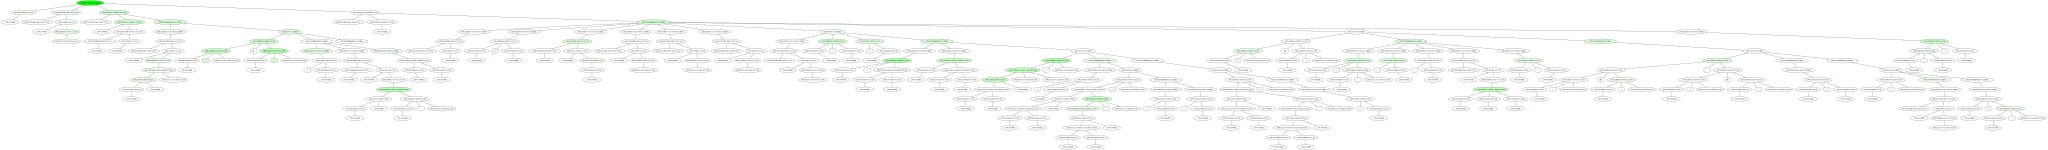

In [45]:

from collections import Counter
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 1
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)

In [44]:
print(counter)
for key, value in counter.items():
    print(str(key) + ": " + str(value))

Counter({0: 197, 123: 19, 125: 18, 57: 18, 239: 17, 166: 15, 258: 15, 286: 14, 55: 14, 209: 13, 124: 12, 50: 12, 13: 11, 34: 11, 9: 10, 44: 10, 134: 9, 46: 9, 10: 9, 3: 9, 101: 8, 39: 8, 135: 8, 48: 8, 49: 7, 98: 7, 58: 7, 139: 7, 19: 7, 45: 6, 83: 6, 138: 6, 193: 5, 64: 5, 126: 5, 96: 4, 15: 4, 313: 4, 314: 3, 76: 3, 229: 3, 60: 3, 111: 3, 92: 3, 175: 2, 334: 2, 18: 2, 235: 2, 176: 2, 2: 2, 170: 2, 146: 2, 27: 2, 177: 2, 22: 1, 1: 1, 214: 1, 7: 1, 56: 1, 163: 1, 78: 1, 36: 1})
96: 4
9: 10
44: 10
49: 7
0: 197
193: 5
123: 19
134: 9
125: 18
209: 13
239: 17
314: 3
57: 18
46: 9
13: 11
76: 3
286: 14
166: 15
15: 4
229: 3
55: 14
60: 3
45: 6
258: 15
98: 7
58: 7
101: 8
124: 12
111: 3
39: 8
175: 2
83: 6
64: 5
10: 9
126: 5
3: 9
139: 7
135: 8
34: 11
138: 6
334: 2
48: 8
50: 12
18: 2
92: 3
19: 7
235: 2
176: 2
22: 1
2: 2
1: 1
170: 2
146: 2
214: 1
313: 4
27: 2
7: 1
177: 2
56: 1
163: 1
78: 1
36: 1


In [28]:
model.summary()

Model: "tbcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
continuous_binary_tree_conv_ multiple                  213000    
_________________________________________________________________
continuous_binary_tree_conv_ multiple                  1080600   
_________________________________________________________________
dynamic_max_pooling_layer (D multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  60100     
Total params: 1,353,700
Trainable params: 1,353,700
Non-trainable params: 0
_________________________________________________________________


In [2]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [30]:
tf.test.is_built_with_cuda()

True

In [31]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False